In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
# Import the tree based methods:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report


In [ ]:
Retail_Data_Response = pd.read_csv('/content/Retail_Data_Response.csv')
annual_day_of_week_counts_pivot = pd.read_excel('/content/annual_day_of_week_counts_pivot.xlsx')
annual_features = pd.read_excel('/content/annual_features.xlsx')

In [ ]:
days_since_last_txn = pd.read_excel('/content/days_since_last_txn.xlsx')
mth_day_counts = pd.read_excel('/content/mth_day_counts.xlsx')
mth_rolling_features = pd.read_excel('/content/mth_rolling_features.xlsx')

In [ ]:
Retail_Data_Response_ann = Retail_Data_Response

In [ ]:
annual_features_outputs = pd.merge(annual_features, annual_day_of_week_counts_pivot, on = 'customer_id')
annual_features_outputs = pd.merge(annual_features_outputs,Retail_Data_Response_ann, on = 'customer_id')

In [ ]:
annual_features_outputs

,customer_id,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,...,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday,response
0,CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,96,81,105,90,...,1,1,0,0,0,0,0,0,1,0
1,CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,94,95,97,97,...,3,0,0,2,0,0,0,0,1,0
2,CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,97,97,105,95,...,1,1,0,0,0,0,1,0,0,1
3,CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,102,104,94,98,...,0,2,0,0,0,0,1,0,0,1
4,CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,87,105,59,96,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6879,CS8996,31.000000,33.666667,41.500000,56.000000,0.000000,38,38,50,79,...,1,2,0,0,0,0,0,0,0,0
6880,CS8997,45.000000,39.500000,35.166667,42.000000,0.000000,47,49,75,45,...,0,0,0,0,0,0,0,0,0,0
6881,CS8998,64.000000,54.400000,47.000000,32.500000,0.000000,69,79,75,49,...,1,1,0,0,0,0,0,0,0,0
6882,CS8999,52.000000,25.250000,28.000000,21.000000,0.000000,64,30,39,24,...,0,2,0,0,0,0,0,0,0,0


In [ ]:
mth_rolling_features = mth_rolling_features.drop(['Unnamed: 0'], axis=1)
days_since_last_txn = days_since_last_txn.drop(['Unnamed: 0'], axis=1)
mth_day_counts = mth_day_counts.drop(['Unnamed: 0'], axis=1)

In [ ]:
monthly_features_outputs = pd.merge(mth_rolling_features, mth_day_counts ,on=['CLNT_NO','ME_DT'])
monthly_features_outputs = pd.merge(monthly_features_outputs, days_since_last_txn, on=['CLNT_NO','ME_DT'])
Retail_Data_Response = Retail_Data_Response.rename(columns={'customer_id': 'CLNT_NO'})
monthly_features_outputs = pd.merge(Retail_Data_Response, monthly_features_outputs, on='CLNT_NO')

In [ ]:
monthly_features_outputs = monthly_features_outputs.fillna(0)

#1.2 Steps for each method (10 points)

In [ ]:
#1. Separate the inputs X and the output y in two data frames.
x_annual,y_annual = annual_features_outputs.drop(['customer_id','response'],axis = 1),annual_features_outputs['response']
x_month,y_month = monthly_features_outputs.drop(['CLNT_NO','ME_DT','response'],axis = 1),monthly_features_outputs['response']

In [ ]:
#Split the data in train and test set.
X_train_annual, X_test_annual, y_train_annual, y_test_annual = train_test_split(x_annual, y_annual, test_size=2/3, random_state=1147)
X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = train_test_split(x_month, y_month, test_size=2/3, random_state=1147)

In [ ]:
X_train_monthly

,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,amt_sum_6M,amt_mean_6M,...,txn_cnt_mean_12M,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn
198323,0,0,103.0,34.333333,103.0,1.0,0.333333,1.0,370.0,61.666667,...,0.500000,2.0,0,0,0,0,0,0,0,89
178932,0,0,37.0,12.333333,37.0,1.0,0.333333,1.0,0.0,0.000000,...,0.000000,0.0,0,0,0,0,0,0,0,37
89272,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.166667,1.0,0,0,0,0,0,0,0,201
50010,40,1,195.0,65.000000,155.0,4.0,1.333333,3.0,0.0,0.000000,...,0.000000,0.0,0,0,0,0,0,1,0,12
241483,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,20.0,3.333333,...,0.250000,1.0,0,0,0,0,0,0,0,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168017,77,1,77.0,25.666667,77.0,1.0,0.333333,1.0,306.0,51.000000,...,0.416667,2.0,0,1,0,0,0,0,0,27
27471,0,0,75.0,25.000000,75.0,1.0,0.333333,1.0,169.0,28.166667,...,0.250000,1.0,0,0,0,0,0,0,0,47
289455,31,1,31.0,10.333333,31.0,1.0,0.333333,1.0,31.0,5.166667,...,0.333333,1.0,0,0,1,0,0,0,0,5
231767,46,1,94.0,31.333333,48.0,2.0,0.666667,1.0,546.0,91.000000,...,0.000000,0.0,0,1,0,0,0,0,0,5


In [ ]:
#Pre-process (if necessary for the method)
scaler = StandardScaler()
X_train_annual = scaler.fit_transform(X_train_annual)
X_test_annual= scaler.transform(X_test_annual)

scaler = StandardScaler()
X_train_monthly = scaler.fit_transform(X_train_monthly)
X_test_monthly= scaler.transform(X_test_monthly)

#annual 

## Logistic Regression with L1 regularization

In [ ]:
#Fit the training dataset and optimize the hyperparameters of the method.
parameters = {'penalty': ['l1'], 'C': np.logspace(-2,3,6),'solver': ['liblinear']}
logreg = LogisticRegression(random_state = 1147)
grid = GridSearchCV(logreg,param_grid = parameters, scoring='f1' ,cv=5,n_jobs=-1)                  

In [ ]:
grid.fit(X_train_annual, y_train_annual)
print('Best f1:',grid.best_score_)      
print('Tuned Hyperparameters:', grid.best_params_)

Best f1: 0.13551353936579255
Tuned Hyperparameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
logreg = LogisticRegression(C=10, penalty ='l1', solver = 'liblinear', random_state=1147)
logreg.fit(X_train_annual,y_train_annual)

LogisticRegression(C=10, penalty='l1', random_state=1147, solver='liblinear')

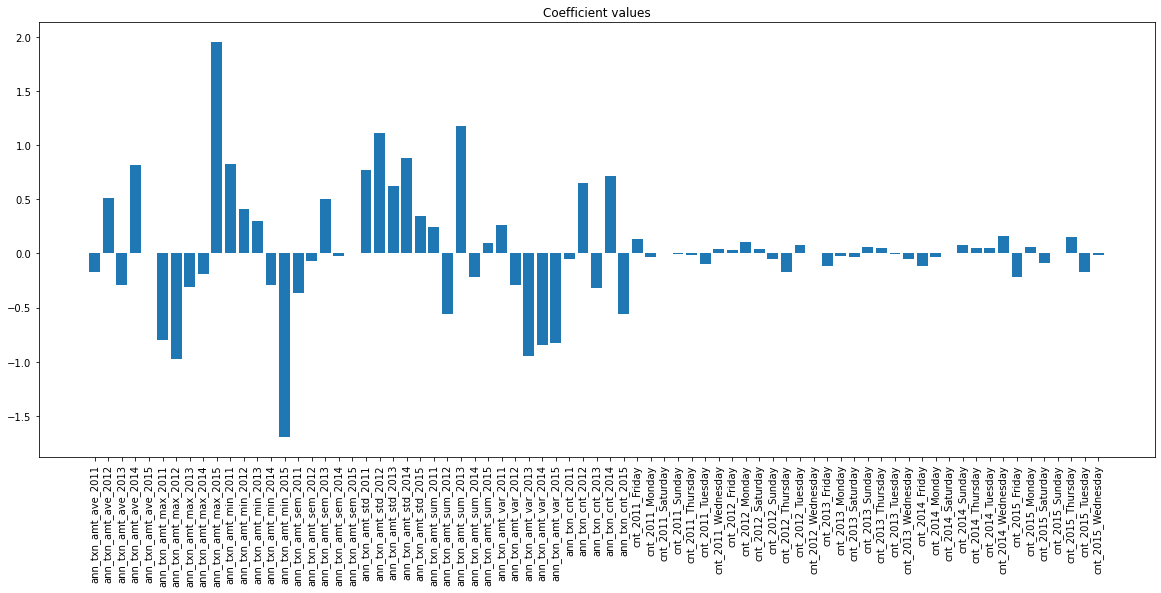

In [ ]:
#Plot coefficient values or feature importance.
m = logreg.coef_
# Create plot
plt.figure(figsize = (20,8))
# Create plot title
plt.title("Coefficient values")
# Add bars
plt.bar(range(x_annual.shape[1]), m[0])
# Add feature names as x-axis labels
plt.xticks(range(x_annual.shape[1]), x_annual.columns, rotation=90)
# Show plot
plt.show()

Text(3.799999999999997, 0.5, 'Counts of clients')

<Figure size 360x360 with 0 Axes>

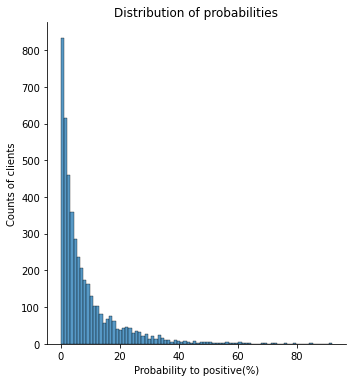

In [ ]:
# Plot probability distribution for test set.
y_test_predicted_annual = logreg.predict(X_test_annual)
y_train_predicted_annual = logreg.predict(X_train_annual)

y_test_proba_annual = logreg.predict_proba(X_test_annual)

plt.figure(figsize=(5,5))
sns.displot(data = y_test_proba_annual[:,1], x = 100*y_test_proba_annual[:,1])
plt.title('Distribution of probabilities')
plt.xlabel('Probability to positive(%)')
plt.ylabel('Counts of clients')

####Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.

In [ ]:
#Plot confusion matrix train/test set. 
cm = confusion_matrix(y_test_annual, y_test_predicted_annual)
print(cm)

[[4102   37]
 [ 439   12]]


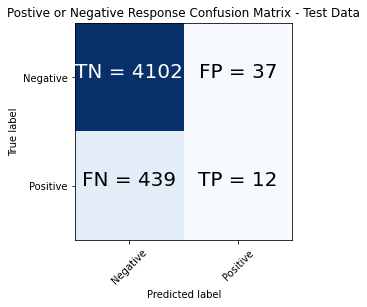

In [ ]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Postive or Negative Response Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

In [ ]:
cm= confusion_matrix(y_train_annual, y_train_predicted_annual)
print(cm)

[[2087   11]
 [ 175   21]]


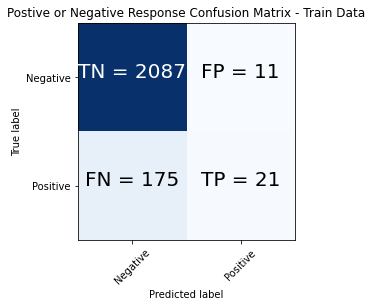

In [ ]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Postive or Negative Response Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

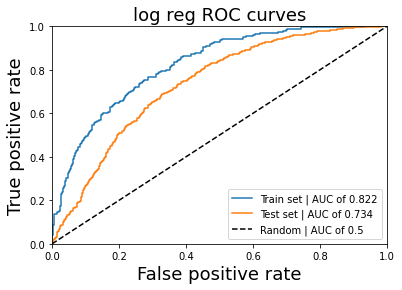

In [ ]:
#ROC curves of train/test set
y_test_proba_annual = logreg.predict_proba(X_test_annual)
y_train_proba_annual = logreg.predict_proba(X_train_annual)
# Scores for train set
scores_train = y_train_proba_annual[:, 1]
# Scores for test set
scores_test = y_test_proba_annual[:, 1]
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('log reg ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

In [ ]:
#Calculate precision/recall.
print(classification_report(y_test_annual, y_test_predicted_annual, target_names = ['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.90      0.99      0.95      4139
    Positive       0.24      0.03      0.05       451

    accuracy                           0.90      4590
   macro avg       0.57      0.51      0.50      4590
weighted avg       0.84      0.90      0.86      4590



####Plot decision boundary for top 2 features.

In [ ]:
top_2 = np.argsort(abs(m[0]))[::-1]
top_2[:2] #Top two features indexes

array([ 9, 14])

In [ ]:
#Plot decision boundary for top 2 features.
##two most important features are 27,28 columns base on previious graph
min_ar  = X_train_annual.min(axis=0)[[9,14]]
max_ar = X_train_annual.max(axis=0)[[9,14]]

In [ ]:
min_1,min_2 = np.floor(min_ar)
max_1,max_2 = np.ceil(max_ar)

step1, step2 = (max_1 - min_1)/10 , (max_2 - min_2)/10
xx, yy = np.mgrid[min_1:max_1:step1, min_2:max_2:step2]
grid = np.c_[xx.ravel(), yy.ravel()]
grid.shape # Confirm that grid shape is 10x10

(100, 2)

In [ ]:
median_inputs = np.ones((100, X_train_annual.shape[1])) * np.median(X_train_annual, axis=0) 
pd.DataFrame(median_inputs)

median_inputs[:,9 ] = grid[:,0]
median_inputs[:,14] = grid[:,1]


[(-2.0, 3.0), (-2.0, 2.0), None]

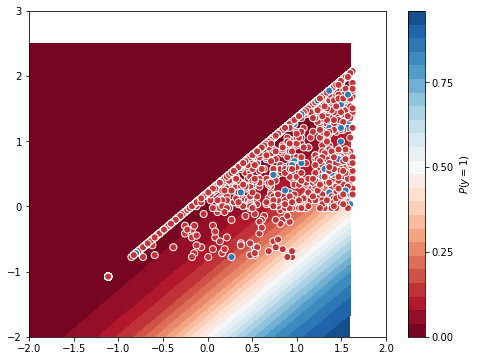

In [ ]:
probs = logreg.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_annual[50:,9], X_train_annual[50:, 14], c=y_train_annual[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax.set(aspect="auto",xlim=(min_1, max_1), ylim=(min_2, max_2))

##Decision Tree

In [ ]:
tree = DecisionTreeClassifier()
tree_param = {'max_depth':[1,2,3,4,5,6,7,8,9],'min_samples_split':[2,5,10,20]}
grid = GridSearchCV(estimator = tree, param_grid = tree_param, scoring='roc_auc', cv=10, n_jobs=4,refit=True)
grid.fit(X_train_annual, y_train_annual)
print('Best roc auc:',grid.best_score_)      
print('Tuned Hyperparameters:', grid.best_params_)

Best roc auc: 0.7077742082478925
Tuned Hyperparameters: {'max_depth': 7, 'min_samples_split': 20}


In [ ]:
tree = DecisionTreeClassifier(min_samples_split= 20,max_depth=7)
tree.fit(X_train_annual, y_train_annual)
#Plot coefficient values or feature importance.
importances = tree.feature_importances_
top_2 = np.argsort(abs(importances))[::-1]
top_2[:2] #Top two features indexes

array([28, 27])

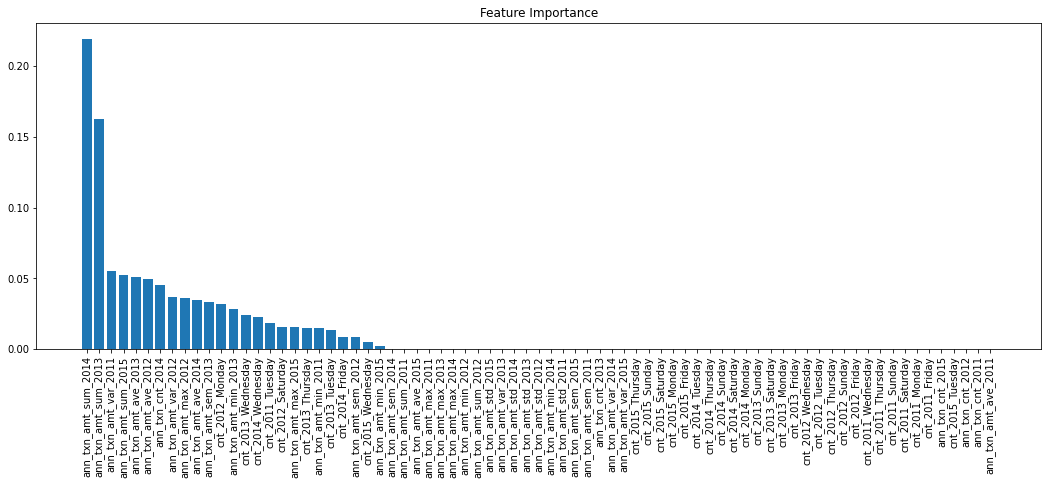

In [ ]:
# Plot features importance
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x_annual.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(18,6))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(x_annual.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(x_annual.shape[1]), names, rotation=90)
# Show plot
plt.show()

Text(0, 0.5, 'Counts of clients')

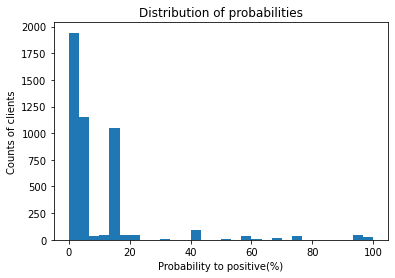

In [ ]:
# Plot probability distribution for test set.
y_test_predicted_annual = tree.predict(X_test_annual)
y_train_predicted_annual = tree.predict(X_train_annual)

y_test_proba_annual = tree.predict_proba(X_test_annual)

plt.hist(100*y_test_proba_annual[:,1], bins=30)
plt.title('Distribution of probabilities')
plt.xlabel('Probability to positive(%)')  
plt.ylabel('Counts of clients')


In [ ]:
#Plot confusion matrix train/test set.
y_test_predicted_annual = tree.predict(X_test_annual)
y_train_predicted_annual = tree.predict(X_train_annual)

y_test_proba_annual = tree.predict_proba(X_test_annual)

cm = confusion_matrix(y_test_annual, y_test_predicted_annual)
print(cm)

[[4012  127]
 [ 415   36]]


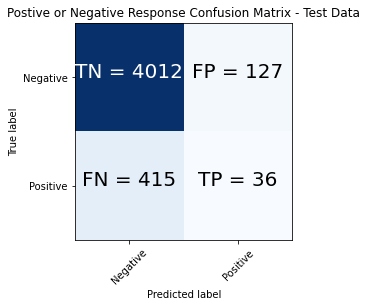

In [ ]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Postive or Negative Response Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

In [ ]:
cm= confusion_matrix(y_train_annual, y_train_predicted_annual)
print(cm)

[[2081   17]
 [ 132   64]]


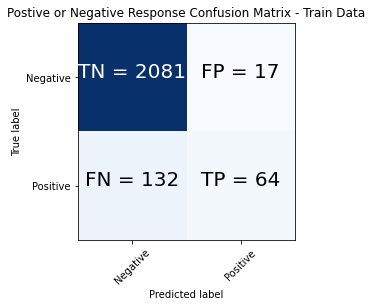

In [ ]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Postive or Negative Response Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

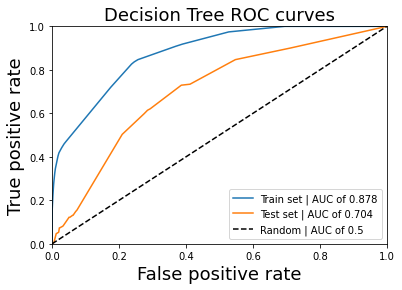

In [ ]:
#ROC curves of train/test set
y_test_proba_annual = tree.predict_proba(X_test_annual)
y_train_proba_annual = tree.predict_proba(X_train_annual)
# Scores for train set
scores_train = y_train_proba_annual[:, 1]
# Scores for test set
scores_test = y_test_proba_annual[:, 1]
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

In [ ]:
#Calculate precision/recall.
print(classification_report(y_test_annual, y_test_predicted_annual, target_names = ['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.91      0.97      0.94      4139
    Positive       0.22      0.08      0.12       451

    accuracy                           0.88      4590
   macro avg       0.56      0.52      0.53      4590
weighted avg       0.84      0.88      0.86      4590



In [ ]:
min_ar  = X_train_annual.min(axis=0)[[28,27]]
max_ar = X_train_annual.max(axis=0)[[28,27]]
min_1,min_2 = np.floor(min_ar)
max_1,max_2 = np.ceil(max_ar)

step1, step2 = (max_1 - min_1)/10 , (max_2 - min_2)/10
xx, yy = np.mgrid[min_1:max_1:step1, min_2:max_2:step2]
grid = np.c_[xx.ravel(), yy.ravel()]
grid.shape # Confirm that grid shape is 10x10

median_inputs = np.ones((100, X_train_annual.shape[1])) * np.median(X_train_annual, axis=0) 
pd.DataFrame(median_inputs)

median_inputs[:,28 ] = grid[:,0]
median_inputs[:,27 ] = grid[:,1]


[(-2.0, 6.0), (-2.0, 4.0), None]

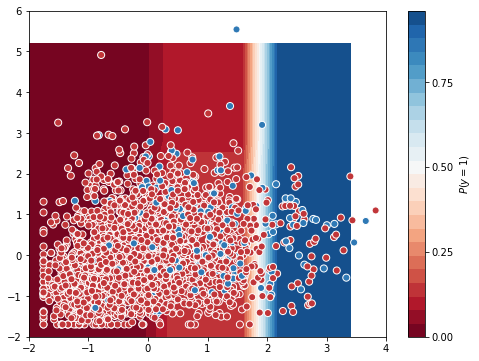

In [ ]:
probs = tree.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_annual[50:,28], X_train_annual[50:, 27], c=y_train_annual[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax.set(aspect="auto",xlim=(min_1, max_1), ylim=(min_2, max_2))

##forest

In [ ]:
model_RF = RandomForestClassifier(random_state=1147)

param_grid = {"n_estimators": [5, 10, 20, 30, 40, 50],
              "max_depth": [1, 2, 3, 4, 5, 6],
              "max_features": [2, 4, 6, 8, 10]}

grid= GridSearchCV(estimator = model_RF, param_grid=param_grid, n_jobs=4, scoring = 'f1',refit=True, verbose=1000, cv=5)

grid.fit(X_train_annual, np.ravel(y_train_annual))
print('Best roc auc:',grid.best_score_)      
print('Tuned Hyperparameters:', grid.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best roc auc: 0.02905842314237096
Tuned Hyperparameters: {'max_depth': 6, 'max_features': 10, 'n_estimators': 5}


In [ ]:
rf = RandomForestClassifier(max_depth=6,n_estimators=5,max_features =10 )
rf.fit(X_train_annual, y_train_annual)


RandomForestClassifier(max_depth=6, max_features=10, n_estimators=5)

In [ ]:
importances = rf.feature_importances_

top_2 = np.argsort(abs(importances))[::-1]
top_2

array([38, 27, 28, 21,  3, 13, 37,  6, 29, 23, 57, 18, 61, 30, 20, 25,  8,
       64,  2,  1, 33, 17, 15, 16, 62,  7, 47,  4, 10, 67, 45, 14, 42, 35,
       63, 31, 24, 59, 60, 12, 26, 58, 66, 43, 72, 65, 11,  0, 22, 55,  5,
        9, 49, 46, 51, 36, 69, 53, 39, 32, 19, 52, 34, 56, 70, 71, 68, 50,
       54, 48, 44, 41, 40, 73, 74])

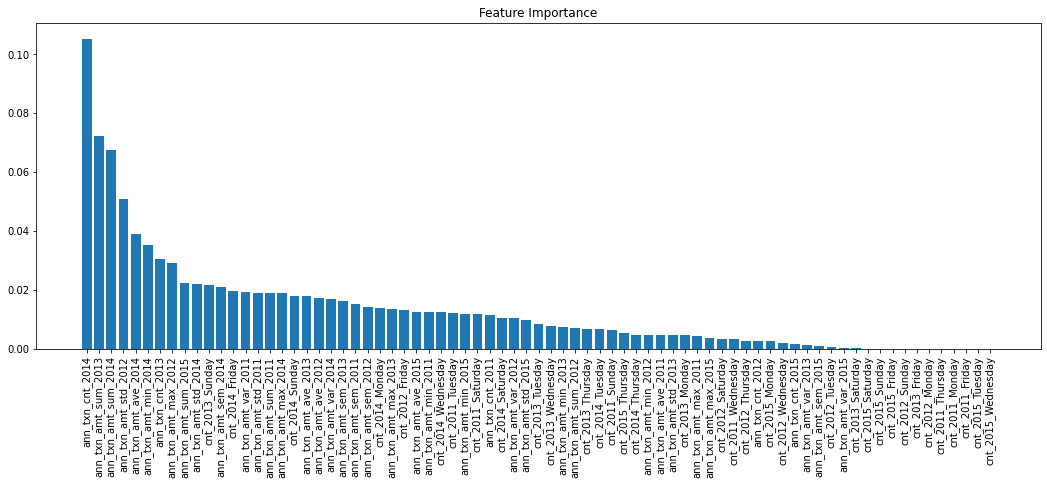

In [ ]:
#Plot coefficient values or feature importance.
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x_annual.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(18,6))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(x_annual.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(x_annual.shape[1]), names, rotation=90)
# Show plot
plt.show()

Text(0, 0.5, 'Counts of clients')

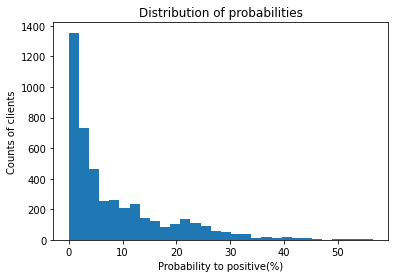

In [ ]:
#Plot probability distribution for test set.
y_test_predicted_annual = rf.predict(X_test_annual)
y_train_predicted_annual = rf.predict(X_train_annual)

y_test_proba_annual = rf.predict_proba(X_test_annual)

plt.hist(100*y_test_proba_annual[:,1], bins=30)
plt.title('Distribution of probabilities')
plt.xlabel('Probability to positive(%)')
plt.ylabel('Counts of clients')


In [ ]:
#Plot confusion matrix train/test set. 
cm = confusion_matrix(y_test_annual, y_test_predicted_annual)
print(cm)

[[4135    4]
 [ 447    4]]


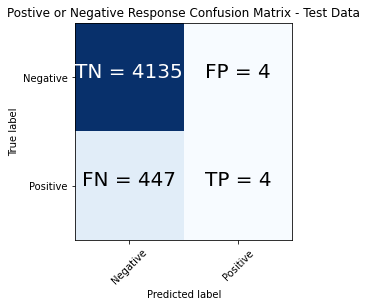

In [ ]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Postive or Negative Response Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

In [ ]:
cm= confusion_matrix(y_train_annual, y_train_predicted_annual)
print(cm)

[[2096    2]
 [ 173   23]]


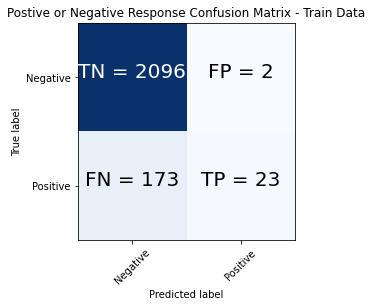

In [ ]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Postive or Negative Response Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

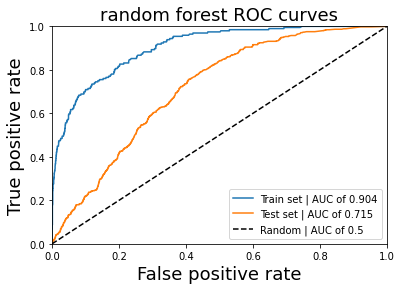

In [ ]:
#ROC curves of train/test set
y_test_proba_annual = rf.predict_proba(X_test_annual)
y_train_proba_annual = rf.predict_proba(X_train_annual)
# Scores for train set
scores_train = y_train_proba_annual[:, 1]
# Scores for test set
scores_test = y_test_proba_annual[:, 1]
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('random forest ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

In [ ]:
#Calculate precision/recall.
print(classification_report(y_test_annual, y_test_predicted_annual, target_names = ['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.90      1.00      0.95      4139
    Positive       0.50      0.01      0.02       451

    accuracy                           0.90      4590
   macro avg       0.70      0.50      0.48      4590
weighted avg       0.86      0.90      0.86      4590



[(-2.0, 6.0), (-3.0, 4.0), None]

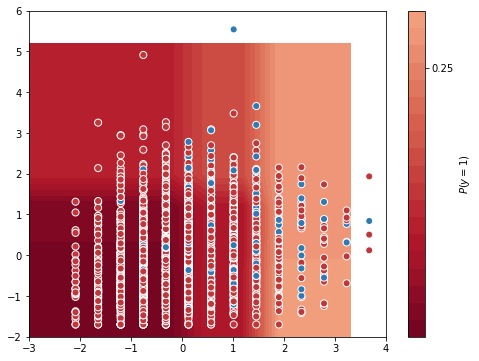

In [ ]:
min_ar  = X_train_annual.min(axis=0)[[38,27]]
max_ar = X_train_annual.max(axis=0)[[38,27]]
min_1,min_2 = np.floor(min_ar)
max_1,max_2 = np.ceil(max_ar)

step1, step2 = (max_1 - min_1)/10 , (max_2 - min_2)/10
xx, yy = np.mgrid[min_1:max_1:step1, min_2:max_2:step2]

grid = np.c_[xx.ravel(), yy.ravel()]

median_inputs = np.ones((100, X_train_annual.shape[1])) * np.median(X_train_annual, axis=0) 
pd.DataFrame(median_inputs)

median_inputs[:,38 ] = grid[:,0]
median_inputs[:,27] = grid[:,1]

probs = rf.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_annual[50:,38], X_train_annual[50:, 27], c=y_train_annual[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax.set(aspect="auto",xlim=(min_1, max_1), ylim=(min_2, max_2))

#monthly

##logreg

In [ ]:
#Fit the training dataset and optimize the hyperparameters of the method.
parameters = {'penalty': ['l1'], 'C': np.logspace(-2,3,6),'solver': ['liblinear']}
logreg = LogisticRegression(random_state = 1147)
grid = GridSearchCV(logreg,param_grid = parameters, scoring='roc_auc' ,cv=5,n_jobs=-1)    
grid.fit(X_train_monthly, y_train_monthly)
print('Best roc auc:',grid.best_score_)      
print('Tuned Hyperparameters:', grid.best_params_)              

Best roc auc: 0.6285069314099319
Tuned Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
logreg = LogisticRegression(C=0.1, penalty ='l1', solver = 'liblinear', random_state=1147)
logreg.fit(X_train_monthly,y_train_monthly)

LogisticRegression(C=0.1, penalty='l1', random_state=1147, solver='liblinear')

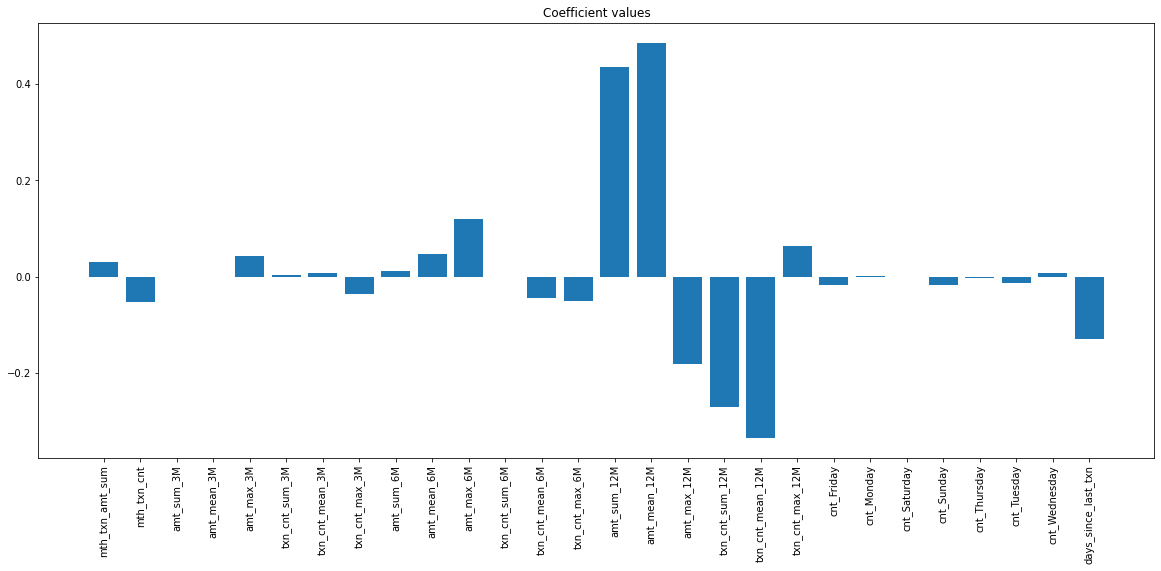

In [ ]:
#Plot coefficient values or feature importance.
m = logreg.coef_
# Create plot
plt.figure(figsize = (20,8))
# Create plot title
plt.title("Coefficient values")
# Add bars
plt.bar(range(x_month.shape[1]), m[0])
# Add feature names as x-axis labels
plt.xticks(range(x_month.shape[1]), x_month.columns, rotation=90)
# Show plot
plt.show()

In [ ]:
top_2 = np.argsort(abs(m[0]))[::-1]
top_2[:2] #Top two features indexes

array([15, 14])

Text(-8.825000000000003, 0.5, 'Counts of clients')

<Figure size 360x360 with 0 Axes>

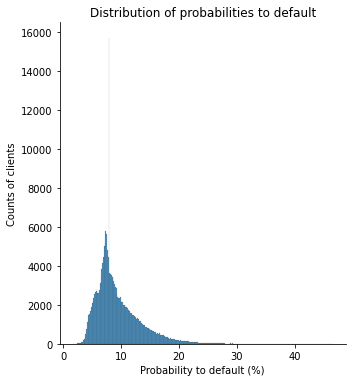

In [ ]:
# Plot probability distribution for test set.
y_test_predicted_monthly = logreg.predict(X_test_monthly)
y_train_predicted_monthly = logreg.predict(X_train_monthly)

y_test_proba_monthly = logreg.predict_proba(X_test_monthly)

plt.figure(figsize=(5,5))
sns.displot(data = y_test_proba_monthly[:,1], x = 100*y_test_proba_monthly[:,1])
plt.title('Distribution of probabilities to default')
plt.xlabel('Probability to default (%)')
plt.ylabel('Counts of clients')

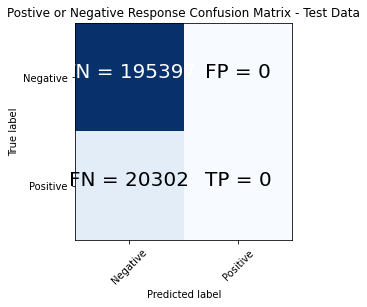

In [ ]:
cm = confusion_matrix(y_test_monthly, y_test_predicted_monthly)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Postive or Negative Response Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

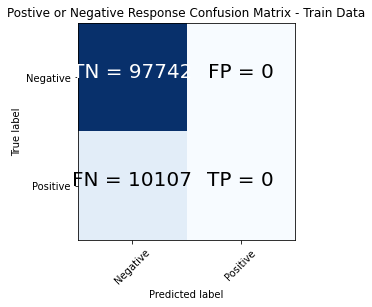

In [ ]:
cm= confusion_matrix(y_train_monthly, y_train_predicted_monthly)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Postive or Negative Response Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

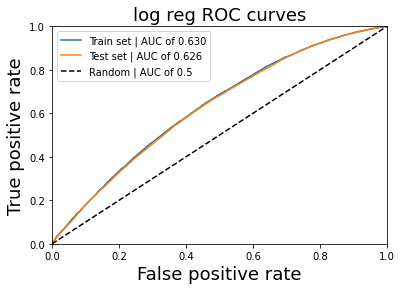

In [ ]:
#ROC curves of train/test set
y_test_proba_monthly = logreg.predict_proba(X_test_monthly)
y_train_proba_monthly = logreg.predict_proba(X_train_monthly)
# Scores for train set
scores_train = y_train_proba_monthly[:, 1]
# Scores for test set
scores_test = y_test_proba_monthly[:, 1]
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('log reg ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

In [ ]:
#Calculate precision/recall.
print(classification_report(y_test_monthly, y_test_predicted_monthly, target_names = ['Negative', 'Positive']))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negative       0.91      1.00      0.95    195397
    Positive       0.00      0.00      0.00     20302

    accuracy                           0.91    215699
   macro avg       0.45      0.50      0.48    215699
weighted avg       0.82      0.91      0.86    215699



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
min_ar  = X_train_monthly.min(axis=0)[[15,14]]
max_ar = X_train_monthly.max(axis=0)[[15,14]]
min_1,min_2 = np.floor(min_ar)
max_1,max_2 = np.ceil(max_ar)

step1, step2 = (max_1 - min_1)/10 , (max_2 - min_2)/10
xx, yy = np.mgrid[min_1:max_1:step1, min_2:max_2:step2]
grid = np.c_[xx.ravel(), yy.ravel()]
grid.shape # Confirm that grid shape is 10x10
median_inputs = np.ones((100, X_train_monthly.shape[1])) * np.median(X_train_monthly, axis=0) 
pd.DataFrame(median_inputs)

median_inputs[:,15 ] = grid[:,0]
median_inputs[:,14] = grid[:,1]


[(-2.0, 5.0), (-2.0, 5.0), None]

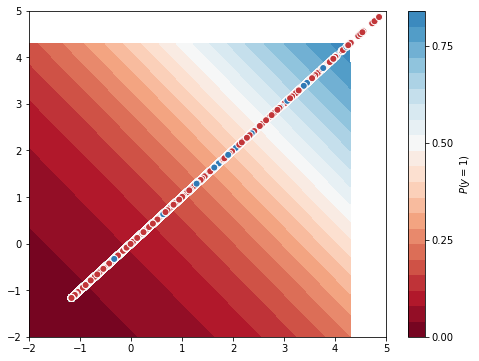

In [ ]:
probs = logreg.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_monthly[50:,15], X_train_monthly[50:, 14], c=y_train_monthly[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax.set(aspect="auto",xlim=(min_1, max_1), ylim=(min_2, max_2))

##decsion tree

In [ ]:
tree = DecisionTreeClassifier(random_state=1147)
tree_param = {'max_depth':[1,2,3,4,5,6,7,8,9],'min_samples_split':[2,5,10,20]}
grid = GridSearchCV(estimator = tree, param_grid = tree_param, scoring='roc_auc', cv=10, n_jobs=4,refit=True)
grid.fit(X_train_monthly, y_train_monthly)
print('Best roc auc:',grid.best_score_)      
print('Tuned Hyperparameters:', grid.best_params_)

Best roc auc: 0.6393291096899121
Tuned Hyperparameters: {'max_depth': 6, 'min_samples_split': 2}


In [ ]:
tree = DecisionTreeClassifier(min_samples_split= 6,max_depth=2)
tree.fit(X_train_monthly, y_train_monthly)
#Plot coefficient values or feature importance.
importances = tree.feature_importances_
top_2 = np.argsort(abs(importances))[::-1]
top_2[:2] #Top two features indexes

array([15, 16])

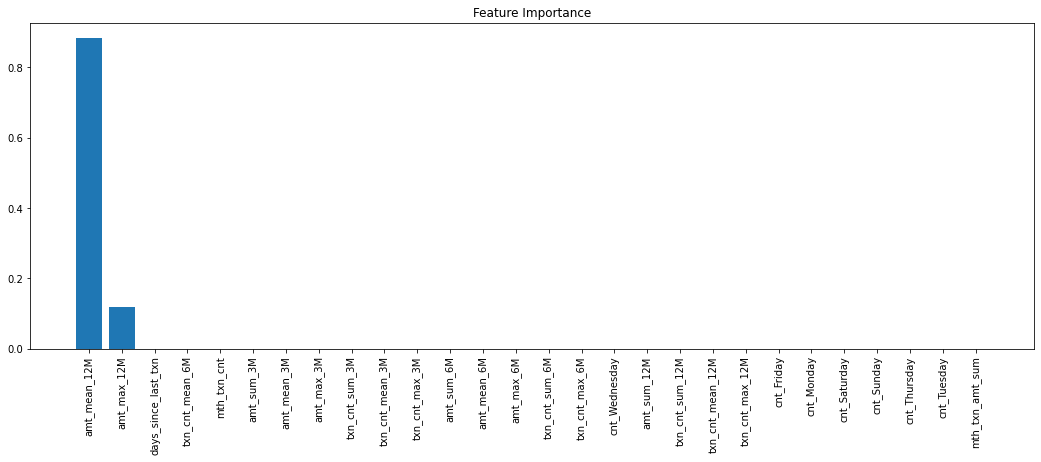

In [ ]:
# Plot features importance
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x_month.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(18,6))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(x_month.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(x_month.shape[1]), names, rotation=90)
# Show plot
plt.show()

Text(0, 0.5, 'Counts of clients')

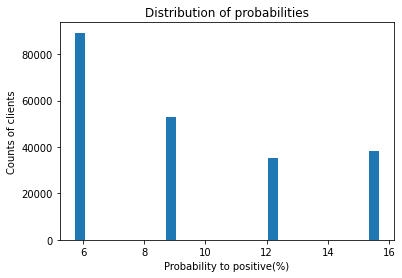

In [ ]:
# Plot probability distribution for test set.
y_test_predicted_monthly = tree.predict(X_test_monthly)
y_train_predicted_monthly = tree.predict(X_train_monthly)

y_test_proba_monthly = tree.predict_proba(X_test_monthly)

plt.hist(100*y_test_proba_monthly[:,1], bins=30)
plt.title('Distribution of probabilities')
plt.xlabel('Probability to positive(%)')  
plt.ylabel('Counts of clients')


In [ ]:
#Plot confusion matrix train/test set.
y_test_predicted_monthly = tree.predict(X_test_monthly)
y_train_predicted_monthly = tree.predict(X_train_monthly)

y_test_proba_monthly = tree.predict_proba(X_test_monthly)

cm = confusion_matrix(y_test_monthly, y_test_predicted_monthly)
print(cm)

[[195397      0]
 [ 20302      0]]


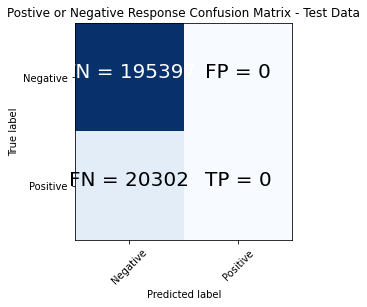

In [ ]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Postive or Negative Response Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

In [ ]:
cm= confusion_matrix(y_train_monthly, y_train_predicted_monthly)
print(cm)

[[97742     0]
 [10107     0]]


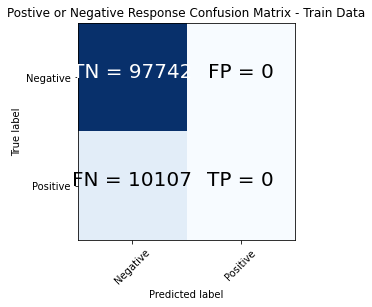

In [ ]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Postive or Negative Response Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

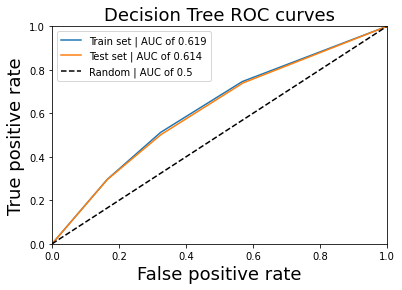

In [ ]:
#ROC curves of train/test set
y_test_proba_monthly = tree.predict_proba(X_test_monthly)
y_train_proba_monthly = tree.predict_proba(X_train_monthly)
# Scores for train set
scores_train = y_train_proba_monthly[:, 1]
# Scores for test set
scores_test = y_test_proba_monthly[:, 1]
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

In [ ]:
#Calculate precision/recall.
print(classification_report(y_test_monthly, y_test_predicted_monthly, target_names = ['Negative', 'Positive']))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negative       0.91      1.00      0.95    195397
    Positive       0.00      0.00      0.00     20302

    accuracy                           0.91    215699
   macro avg       0.45      0.50      0.48    215699
weighted avg       0.82      0.91      0.86    215699



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
min_ar  = X_train_monthly.min(axis=0)[[15,16]]
max_ar = X_train_monthly.max(axis=0)[[15,16]]
min_1,min_2 = np.floor(min_ar)
max_1,max_2 = np.ceil(max_ar)

step1, step2 = (max_1 - min_1)/10 , (max_2 - min_2)/10
xx, yy = np.mgrid[min_1:max_1:step1, min_2:max_2:step2]
grid = np.c_[xx.ravel(), yy.ravel()]
grid.shape # Confirm that grid shape is 10x10

median_inputs = np.ones((100, X_train_monthly.shape[1])) * np.median(X_train_monthly, axis=0) 
pd.DataFrame(median_inputs)

median_inputs[:,15] = grid[:,0]
median_inputs[:,16] = grid[:,1]


[(-2.0, 6.0), (-2.0, 5.0), None]

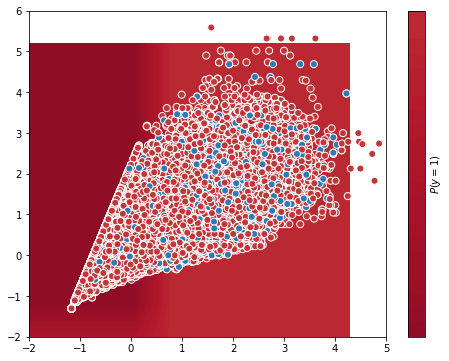

In [ ]:
probs = tree.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_monthly[50:,15], X_train_monthly[50:, 16], c=y_train_monthly[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax.set(aspect="auto",xlim=(min_1, max_1), ylim=(min_2, max_2))

##random forest

In [ ]:
model_RF = RandomForestClassifier(random_state=1147)

param_grid = {"n_estimators": [10, 20, 40],
              "max_depth": [1, 2, 3, 4, 5, 6]}

grid= GridSearchCV(estimator = model_RF, param_grid=param_grid, n_jobs=4,refit=True, verbose=1000, cv=5)

grid.fit(X_train_monthly, np.ravel(y_train_monthly))
print('Best f1:',grid.best_score_)      
print('Tuned Hyperparameters:', grid.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best f1: 0.9062856402476527
Tuned Hyperparameters: {'max_depth': 1, 'n_estimators': 10}


In [ ]:
rf = RandomForestClassifier(max_depth=1,n_estimators=10 )
rf.fit(X_train_monthly, y_train_monthly)


RandomForestClassifier(max_depth=1, n_estimators=10)

In [ ]:
importances = rf.feature_importances_

top_2 = np.argsort(abs(importances))[::-1]
top_2

array([18, 14,  9, 15, 27, 11,  1,  2,  3,  4,  5,  6,  7,  8, 10, 13, 12,
       26, 16, 17, 19, 20, 21, 22, 23, 24, 25,  0])

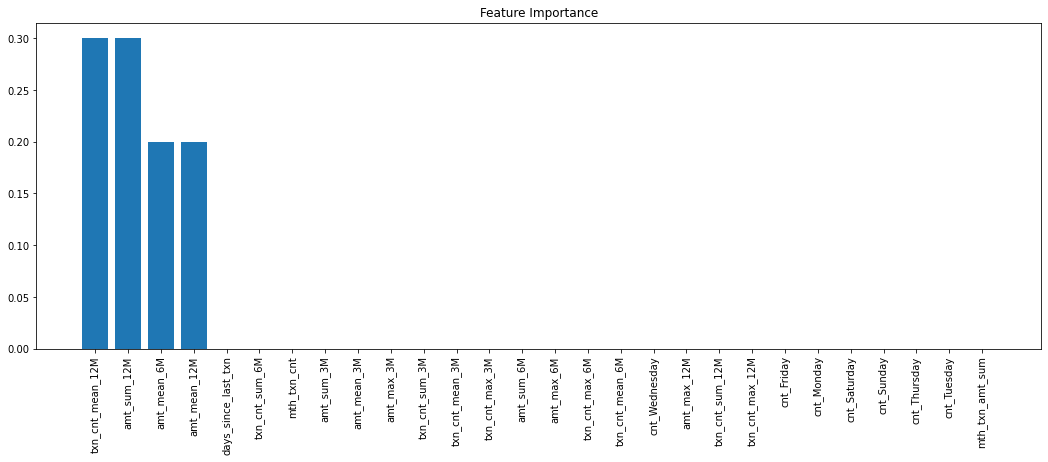

In [ ]:
#Plot coefficient values or feature importance.
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x_month.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(18,6))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(x_month.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(x_month.shape[1]), names, rotation=90)
# Show plot
plt.show()

Text(0, 0.5, 'Counts of clients')

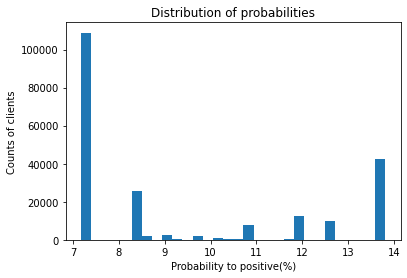

In [ ]:
#Plot probability distribution for test set.
y_test_predicted_monthly = rf.predict(X_test_monthly)
y_train_predicted_monthly = rf.predict(X_train_monthly)

y_test_proba_monthly = rf.predict_proba(X_test_monthly)

plt.hist(100*y_test_proba_monthly[:,1], bins=30)
plt.title('Distribution of probabilities')
plt.xlabel('Probability to positive(%)')
plt.ylabel('Counts of clients')


In [ ]:
#Plot confusion matrix train/test set. 
cm = confusion_matrix(y_test_monthly, y_test_predicted_monthly)
print(cm)

[[195397      0]
 [ 20302      0]]


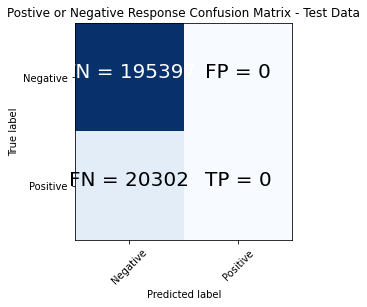

In [ ]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Postive or Negative Response Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

In [ ]:
cm= confusion_matrix(y_train_monthly, y_train_predicted_monthly)
print(cm)

[[97742     0]
 [10107     0]]


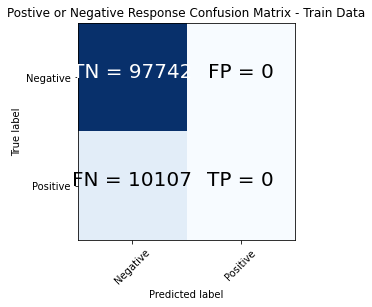

In [ ]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Postive or Negative Response Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

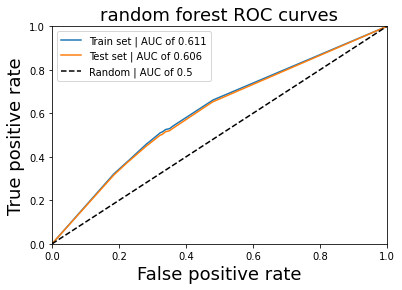

In [ ]:
#ROC curves of train/test set
y_test_proba_monthly = rf.predict_proba(X_test_monthly)
y_train_proba_monthly = rf.predict_proba(X_train_monthly)
# Scores for train set
scores_train = y_train_proba_monthly[:, 1]
# Scores for test set
scores_test = y_test_proba_monthly[:, 1]
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('random forest ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

In [ ]:
#Calculate precision/recall.
print(classification_report(y_test_monthly, y_test_predicted_monthly, target_names = ['Negative', 'Positive']))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negative       0.91      1.00      0.95    195397
    Positive       0.00      0.00      0.00     20302

    accuracy                           0.91    215699
   macro avg       0.45      0.50      0.48    215699
weighted avg       0.82      0.91      0.86    215699



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[(-2.0, 5.0), (-2.0, 6.0), None]

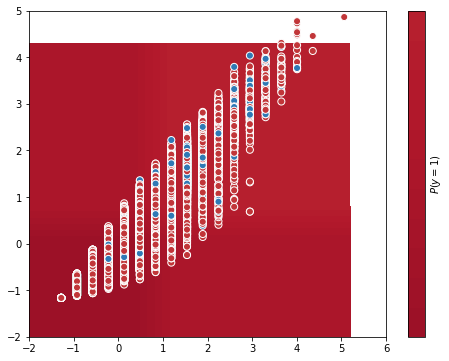

In [ ]:
min_ar  = X_train_monthly.min(axis=0)[[18,14]]
max_ar = X_train_monthly.max(axis=0)[[18,14]]
min_1,min_2 = np.floor(min_ar)
max_1,max_2 = np.ceil(max_ar)

step1, step2 = (max_1 - min_1)/10 , (max_2 - min_2)/10
xx, yy = np.mgrid[min_1:max_1:step1, min_2:max_2:step2]

grid = np.c_[xx.ravel(), yy.ravel()]

median_inputs = np.ones((100, X_train_monthly.shape[1])) * np.median(X_train_monthly, axis=0) 
pd.DataFrame(median_inputs)

median_inputs[:,18] = grid[:,0]
median_inputs[:,14] = grid[:,1]

probs = rf.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_monthly[50:,18], X_train_monthly[50:, 14], c=y_train_monthly[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax.set(aspect="auto",xlim=(min_1, max_1), ylim=(min_2, max_2))

#summary



| feature of table | algorithms |precision(positive)|recall|f1|test auc|training auc | probability distribution description 
| ------------- | ------------- |------------- |------------- |------------- |------------- |------------- |------------- |
| annual  | log reg|0.24 |0.03|0.05|0.734|0.822|distribution of probability more even, highest at 5% to positive with around 800 counts of clients
| - | decsion tree|0.22|0.08|0.12|0.704|0.878|more skewed right, probability to postive highest at 0% with around 1900 counts of clients
| - | random forest|0.5|0.01|0.02|0.715|0.904| less skewed right,probability to postive highest at 0% with around 1400 counts of clients
| monthly | log reg |0.00|0.00|0.00 |0.626|0.630|probability to postive highest at 8% with around 6000 counts of clients
| - | decsion tree|0.00|0.00|0.00 |0.614|0.619|spread evenly in four bins, probability to postive highest at 6% with around 80000 counts of clients
| - | random forest|0.00|0.00|0.00 |0.606|0.611|high at lower probability to postive then have another peak at 14%,probability to postive highest at 7% with around 100000 counts of clients

Which combination of feature engineering and modeling approach do you select as the best to deploy in a production environment and why?

A:From the test auc result, both annual and monthly datas have better auc on testing data when fit the model of logistic regresion with L1 regularition. Although decsion tree and random forests use fewer features to fit the model,they are more efficient and less waste of resource.The resluts of logistic regression could have better outcomes.Base on distribution of probability of test data, logistic regression tends to show a more smooth plot in diifferent probabliities to respond postive.So between three algorithms, we choose logistic regression.The algorithm for annual data is LogisticRegression(C=10, penalty ='l1', solver = 'liblinear', random_state=1147).The algorithm for monthly data is LogisticRegression(C=0.1, penalty ='l1', solver = 'liblinear', random_state=1147).

Then I copmared these two models by confusion matrix, I found out the precision of annual feature data is higher than monthly feature data, which leads to my final decision :annual feature data with logistic regression.